In [1]:
# install pandas and fbprophet and import the libraries

import pandas as pd
from fbprophet import Prophet

%matplotlib inline
import matplotlib.pyplot as plt

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
cleanData = pd.read_csv('Dataset/clean_data.csv')
cleanData.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [3]:
cleanData['Date'] = pd.to_datetime(cleanData['Date'])
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 2 columns):
Date     7641 non-null datetime64[ns]
Price    7641 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 119.5 KB


In [4]:
cleanData = cleanData.rename(columns={'Date':'ds','Price':'y'})
cleanData.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [5]:
oilPrice = cleanData['y'] 
oilPrice.head(10)

0    18.63
1    18.45
2    18.55
3    18.60
4    18.63
5    18.60
6    18.60
7    18.58
8    18.65
9    18.68
Name: y, dtype: float64

In [6]:
import numpy as np
cleanData['y'] = np.log(cleanData['y'])

In [7]:
OilPriceModel= Prophet()
OilPriceModel.fit(cleanData)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\aafia\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [8]:
FutureOilPrice = OilPriceModel.make_future_dataframe(periods=1065)
FutureOilPrice.tail()

,ds
8701,2020-05-22
8702,2020-05-23
8703,2020-05-24
8704,2020-05-25
8705,2020-05-26


In [9]:
ForecastOilPrice = OilPriceModel.predict(FutureOilPrice)
ForecastOilPrice[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8701,2020-05-22,3.204951,2.031214,4.400306
8702,2020-05-23,3.181742,1.988435,4.340643
8703,2020-05-24,3.181235,2.025709,4.367235
8704,2020-05-25,3.204782,2.072410,4.362095
8705,2020-05-26,3.200564,2.034551,4.375005


<Figure size 1296x432 with 0 Axes>

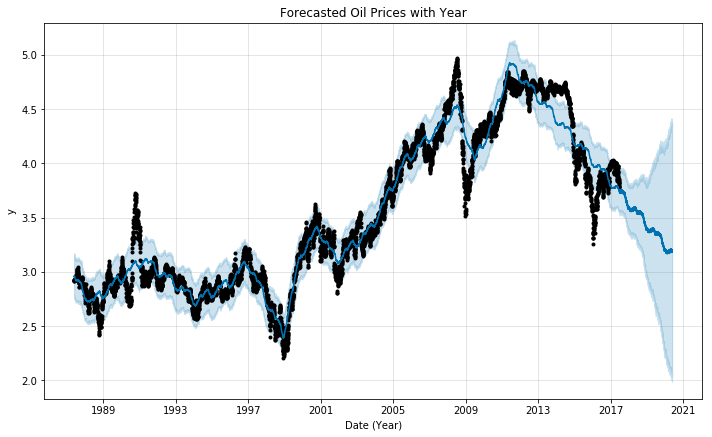

In [10]:
plt.figure(figsize=(18, 6))
OilPriceModel.plot(ForecastOilPrice, xlabel = 'Date (Year)')
plt.title('Forecasted Oil Prices with Year');

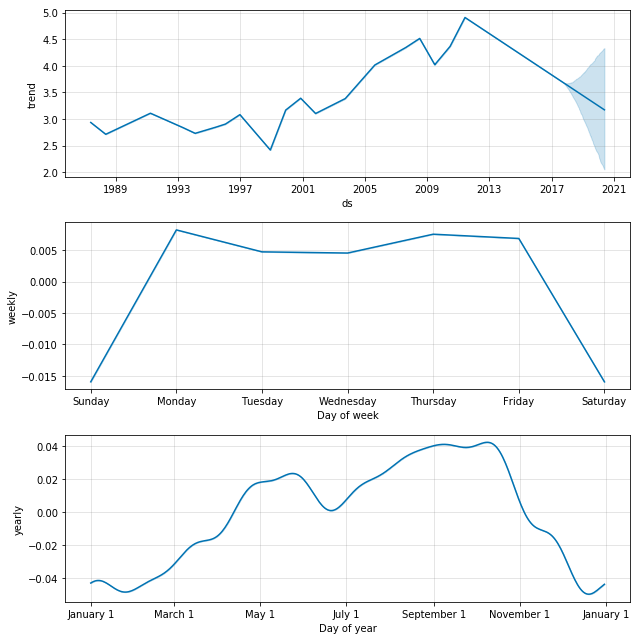

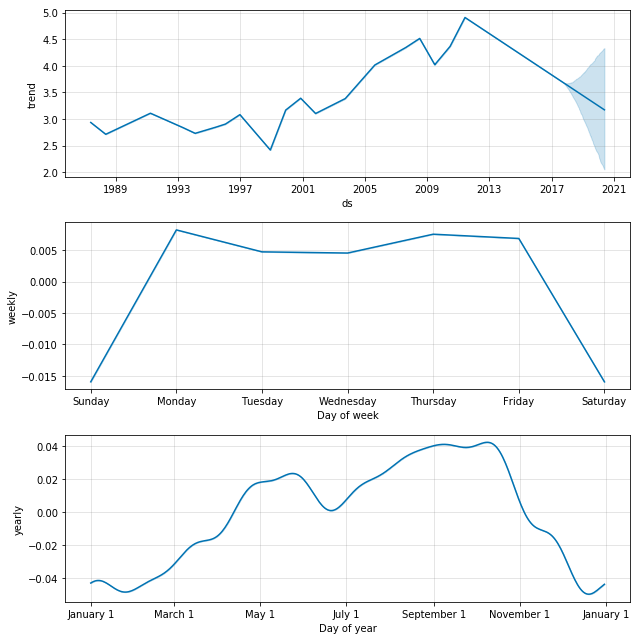

In [11]:
OilPriceModel.plot_components(ForecastOilPrice)

In [13]:
from fbprophet.diagnostics import cross_validation

cv_results = cross_validation(OilPriceModel, initial = '140 days', period = '420 days', horizon = '130 days')

INFO:fbprophet:Making 26 forecasts with cutoffs between 1988-05-19 00:00:00 and 2017-02-16 00:00:00


In [14]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,14 days,0.074900,0.273678,0.186210,0.050815,0.475262
1,15 days,0.076690,0.276930,0.188841,0.051633,0.457256
2,18 days,0.077231,0.277904,0.190693,0.052270,0.438495
3,19 days,0.080749,0.284163,0.195382,0.053711,0.418767
4,20 days,0.084275,0.290302,0.199759,0.055104,0.402188


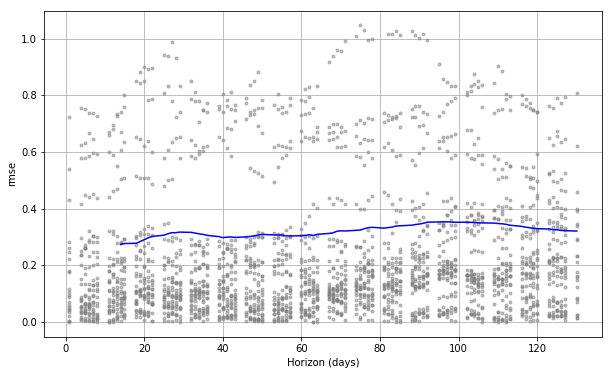

In [15]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric = 'rmse')